비지도 학습 : 머신러닝의 미래
- 입력데이터(X)만 존재, 출력(Y) 없음

In [1]:
#p221 10개의 숫자 이미지 OCR(Optical 관학 Character 글자 Recognization 인식)
# 비지도학습으로 숫자 인식을 할 수 있다.

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
digits.target.shape  # Y 예측 목표(타겟)

(1797,)

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
import matplotlib.pyplot as plt

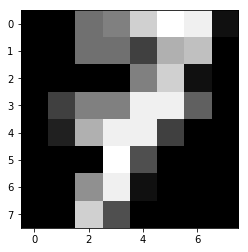

In [8]:
plt.imshow(digits.images[7], cmap='gray')

In [9]:
# P221 64개의 명암값을 2개의 차원축소를 해서 2차원 그래프에 산정도로 그려봅니다.

In [10]:
from sklearn.decomposition import PCA
import mglearn

In [11]:
pca = PCA(n_components=2).fit(digits.data)   #64차원을 2차원으로 축소 => 64개 중 가장 특징 있는 것 2개로 나타냄.

In [12]:
pca_x = pca.transform(digits.data)
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

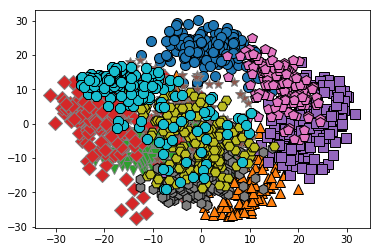

In [13]:
l = mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], digits.target)

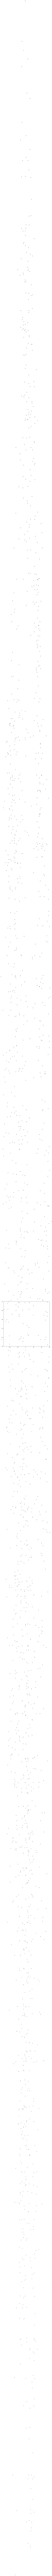

In [27]:
plt.figure(figsize=(10,10))
plt.xlim(pca_x[:,0].min(), pca_x[:,0].max())
plt.xlim(pca_x[:,1].min(), pca_x[:,1].max())
for i in range(len(pca_x)):
    plt.text(pca_x[i,0], pca_x[i,1], str(digits.target[i]))

In [15]:
# p223
from sklearn.manifold import TSNE

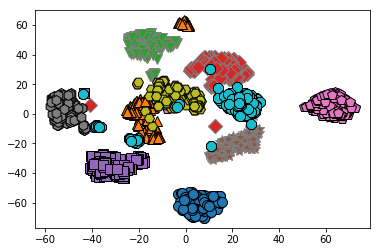

In [16]:
digits_tsne = TSNE().fit_transform(digits.data)
l = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], digits.target)

P225 군집(clustering) - 사용 용도 : 분류, 이상치 검출(Abnormal Detection)
- k 평균 군집
- 병합 군집
- DBSCAN (Density based spatial clustering Application Noise) 밀도가 높은 공간

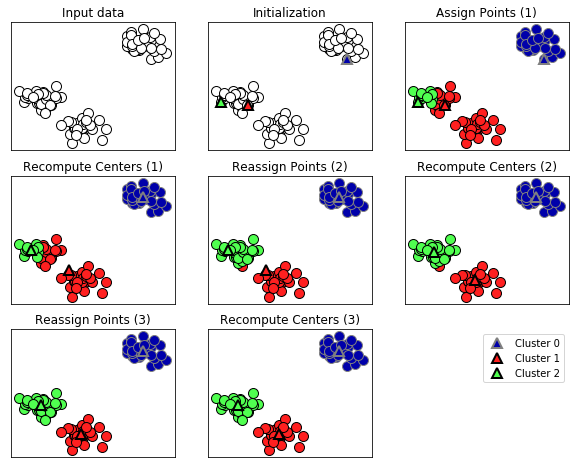

In [18]:
mglearn.plots.plot_kmeans_algorithm()

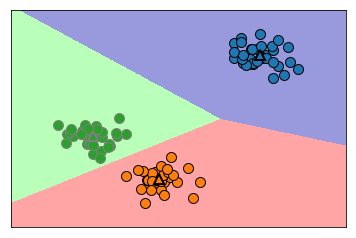

In [19]:
mglearn.plots.plot_kmeans_boundaries()  # 센터와 센터의 중간에 경계를 잡음

digit에 적용해보세요
- t-SNE로 2개의 차원으로 축소합니다.
- 그 데이터로 K-Means를 fit합니다. k = 10
- k-Means의 예측을 산정도에서 표시합니다.

In [49]:
from sklearn.cluster import KMeans

digit_tsme = TSNE().fit_transform(digits.data)
km = KMeans(n_clusters=10).fit(digit_tsme)  # x를 3개로 그룹화(cluster)
predict_group = km.predict(digit_tsme) # x가 몇번째 그룹이니?

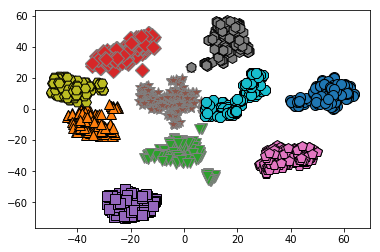

In [50]:
l = mglearn.discrete_scatter(digit_tsme[:,0], digit_tsme[:,1], predict_group)

In [28]:
# p227
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

x, y = make_blobs(random_state=1)
x.shape, y.shape

((100, 2), (100,))

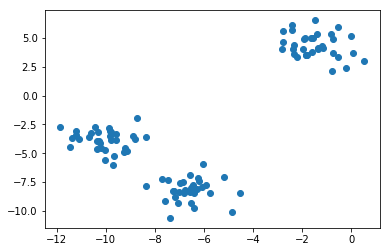

In [22]:
plt.scatter(x[:,0], x[:,1])

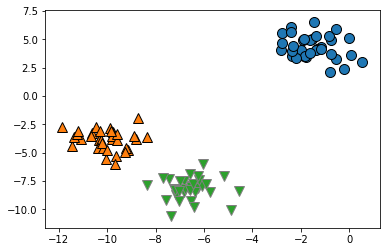

In [24]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], y)

In [29]:
km = KMeans(n_clusters=3).fit(x)  # x를 3개로 그룹화(cluster)

In [40]:
km.predict(x) # x가 몇번째 그룹이니?

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

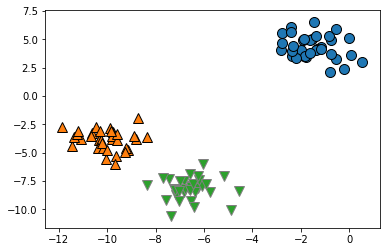

In [41]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], y)

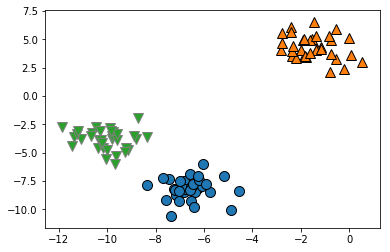

In [42]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], km.predict(x))